In [1]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 13.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1cf2cfb87f366daffe19f00f2eba75acda9b4c5bf33ac8292fdaf861ad584e98
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lifelines
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [5]:
from sklearn.preprocessing import LabelEncoder
from lifelines import CoxPHFitter

In [6]:
df_metabric = pd.read_csv('/content/Breast Cancer METABRIC.csv')
df_metabric = df_metabric.dropna()

In [7]:
df_metabric = df_metabric.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
df_metabric['Patient ID'] =  df_metabric['Patient ID'].astype('object')

tumor_stage_type = CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True)
df_metabric['Tumor Stage'] = df_metabric['Tumor Stage'].astype(tumor_stage_type)

In [8]:
df_metabric['Overall Survival Status'] = np.uint8(df_metabric['Overall Survival Status'].map({'Living': 0, 'Deceased': 1})).astype(int)
df_metabric['Relapse Free Status'] = np.uint8(df_metabric['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1})).astype(int)

In [9]:
df_metabric

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,0,Positive,Yes,83.52,0,Female,ER+/HER2- High Prolif,10.0,1,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,1,Positive,Yes,18.55,1,Female,ER+/HER2- High Prolif,40.0,2,Died of Disease
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,1,Positive,Yes,2.89,1,Female,ER+/HER2- High Prolif,31.0,4,Died of Disease
10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,1,Negative,Yes,36.09,0,Female,ER+/HER2- High Prolif,16.0,2,Died of Other Causes
11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,1,Negative,No,35.79,1,Female,ER+/HER2- High Prolif,28.0,2,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,MB-6232,71.22,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumA,5.0,Positve,...,1,Positive,No,83.88,0,Female,ER+/HER2- Low Prolif,30.0,2,Died of Other Causes
1698,MB-6233,70.65,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumB,5.0,Positve,...,0,Positive,Yes,198.52,0,Female,ER+/HER2- Low Prolif,20.0,1,Living
1700,MB-6237,75.62,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,Basal,5.0,Negative,...,1,Negative,No,103.82,0,Female,ER-/HER2-,20.0,1,Died of Other Causes
1702,MB-6239,52.84,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Normal,5.0,Positve,...,0,Positive,Yes,197.70,0,Female,ER+/HER2- High Prolif,20.0,2,Living


In [10]:
min_age = df_metabric['Age at Diagnosis'].min()
max_age = df_metabric['Age at Diagnosis'].max()

In [11]:
max_age = max_age + (10 - max_age % 10) if max_age % 10 != 0 else max_age

bins = np.arange(min_age - (min_age % 10), max_age + 10, 10)

labels = [f"{i}-{i + 10}" for i in bins[:-1]]

df_metabric['Age Group'] = pd.cut(df_metabric['Age at Diagnosis'], bins=bins, labels=labels, right=False)
df_metabric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 1 to 1743
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      1092 non-null   object  
 1   Age at Diagnosis                1092 non-null   float64 
 2   Type of Breast Surgery          1092 non-null   category
 3   Cancer Type                     1092 non-null   category
 4   Cancer Type Detailed            1092 non-null   category
 5   Cellularity                     1092 non-null   category
 6   Chemotherapy                    1092 non-null   category
 7   Pam50 + Claudin-low subtype     1092 non-null   category
 8   Cohort                          1092 non-null   float64 
 9   ER status measured by IHC       1092 non-null   category
 10  ER Status                       1092 non-null   category
 11  Neoplasm Histologic Grade       1092 non-null   float64 
 12  HER2 status measured

In [12]:
df_metabric

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status,Age Group
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Positive,Yes,83.52,0,Female,ER+/HER2- High Prolif,10.0,1,Living,40.0-50.0
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Positive,Yes,18.55,1,Female,ER+/HER2- High Prolif,40.0,2,Died of Disease,70.0-80.0
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Positive,Yes,2.89,1,Female,ER+/HER2- High Prolif,31.0,4,Died of Disease,70.0-80.0
10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Negative,Yes,36.09,0,Female,ER+/HER2- High Prolif,16.0,2,Died of Other Causes,80.0-90.0
11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,Negative,No,35.79,1,Female,ER+/HER2- High Prolif,28.0,2,Died of Disease,80.0-90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,MB-6232,71.22,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumA,5.0,Positve,...,Positive,No,83.88,0,Female,ER+/HER2- Low Prolif,30.0,2,Died of Other Causes,70.0-80.0
1698,MB-6233,70.65,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumB,5.0,Positve,...,Positive,Yes,198.52,0,Female,ER+/HER2- Low Prolif,20.0,1,Living,70.0-80.0
1700,MB-6237,75.62,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,Basal,5.0,Negative,...,Negative,No,103.82,0,Female,ER-/HER2-,20.0,1,Died of Other Causes,70.0-80.0
1702,MB-6239,52.84,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Normal,5.0,Positve,...,Positive,Yes,197.70,0,Female,ER+/HER2- High Prolif,20.0,2,Living,50.0-60.0


<ipython-input-13-e6d0235611ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_metabric.corr()


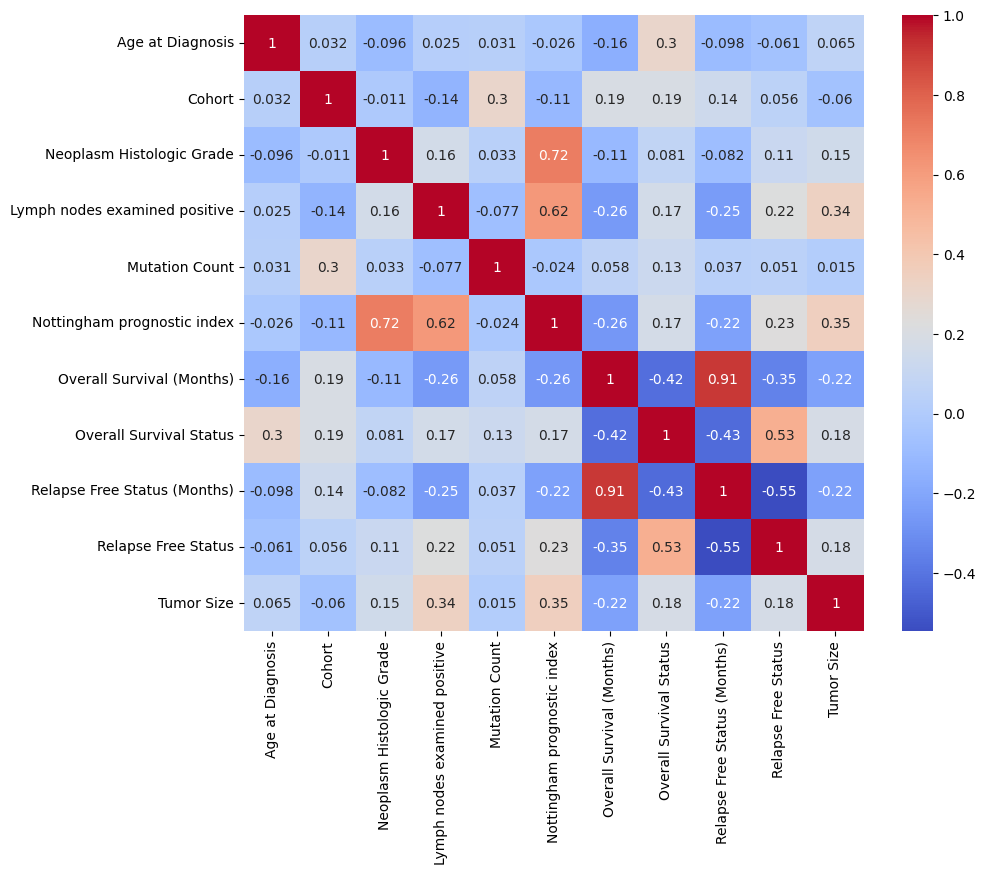

In [13]:
corr = df_metabric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

 Cox Relapse

In [15]:
df_metabric.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status', 'Age Group'],
      dtype='object')

In [16]:
df_relapse= df_metabric[['Relapse Free Status','Relapse Free Status (Months)','Age Group', 'Lymph nodes examined positive','Mutation Count','Pam50 + Claudin-low subtype', 'Neoplasm Histologic Grade', '3-Gene classifier subtype', 'PR Status', 'Tumor Stage', 'HER2 Status','Chemotherapy','Hormone Therapy','Radio Therapy','Inferred Menopausal State']]


In [17]:
df_relapse

,Relapse Free Status,Relapse Free Status (Months),Age Group,Lymph nodes examined positive,Mutation Count,Pam50 + Claudin-low subtype,Neoplasm Histologic Grade,3-Gene classifier subtype,PR Status,Tumor Stage,HER2 Status,Chemotherapy,Hormone Therapy,Radio Therapy,Inferred Menopausal State
1,0,83.52,40.0-50.0,0.0,2.0,LumA,3.0,ER+/HER2- High Prolif,Positive,1,Negative,No,Yes,Yes,Pre
4,1,18.55,70.0-80.0,8.0,2.0,LumB,3.0,ER+/HER2- High Prolif,Positive,2,Negative,Yes,Yes,Yes,Post
5,1,2.89,70.0-80.0,0.0,4.0,LumB,3.0,ER+/HER2- High Prolif,Positive,4,Negative,No,Yes,Yes,Post
10,0,36.09,80.0-90.0,1.0,4.0,LumB,3.0,ER+/HER2- High Prolif,Negative,2,Negative,No,Yes,Yes,Post
11,1,35.79,80.0-90.0,0.0,5.0,Her2,2.0,ER+/HER2- High Prolif,Negative,2,Negative,No,No,No,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,0,83.88,70.0-80.0,4.0,11.0,LumA,2.0,ER+/HER2- Low Prolif,Positive,2,Negative,No,Yes,No,Post
1698,0,198.52,70.0-80.0,0.0,9.0,LumB,1.0,ER+/HER2- Low Prolif,Positive,1,Negative,No,No,Yes,Post
1700,0,103.82,70.0-80.0,0.0,4.0,Basal,3.0,ER-/HER2-,Negative,1,Negative,No,No,No,Post
1702,0,197.70,50.0-60.0,6.0,5.0,Normal,2.0,ER+/HER2- High Prolif,Positive,2,Negative,Yes,No,Yes,Post


In [18]:
mutation_count_min = df_relapse['Mutation Count'].min()
mutation_count_max = df_relapse['Mutation Count'].max()


bins = pd.interval_range(start=mutation_count_min, end=mutation_count_max, freq=(mutation_count_max - mutation_count_min)/5)


df_relapse['Mutation_Count_Group'] = pd.cut(df_relapse['Mutation Count'], bins=bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


print(df_relapse[['Mutation Count', 'Mutation_Count_Group']])

      Mutation Count Mutation_Count_Group
1                2.0          (1.0, 10.0]
4                2.0          (1.0, 10.0]
5                4.0          (1.0, 10.0]
10               4.0          (1.0, 10.0]
11               5.0          (1.0, 10.0]
...              ...                  ...
1697            11.0         (10.0, 19.0]
1698             9.0          (1.0, 10.0]
1700             4.0          (1.0, 10.0]
1702             5.0          (1.0, 10.0]
1743             3.0          (1.0, 10.0]

[1092 rows x 2 columns]


<ipython-input-18-364c9d5c2297>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relapse['Mutation_Count_Group'] = pd.cut(df_relapse['Mutation Count'], bins=bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


In [19]:
df_relapse['Lymph nodes examined positive'].unique()

array([ 0.,  8.,  1., 16.,  5., 14.,  6.,  2.,  3.,  9., 22.,  4.,  7.,
       21., 12., 25., 10., 41., 15., 13., 11., 19., 17., 23., 18., 31.])

In [20]:
bins = [0, 8, 16, 24, 32, 41]

df_relapse['lymph_nodes_group'] = pd.cut(df_relapse['Lymph nodes examined positive'], bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


print(df_relapse[['Lymph nodes examined positive', 'lymph_nodes_group']])

      Lymph nodes examined positive lymph_nodes_group
1                               0.0           Group 1
4                               8.0           Group 1
5                               0.0           Group 1
10                              1.0           Group 1
11                              0.0           Group 1
...                             ...               ...
1697                            4.0           Group 1
1698                            0.0           Group 1
1700                            0.0           Group 1
1702                            6.0           Group 1
1743                            0.0           Group 1

[1092 rows x 2 columns]


<ipython-input-20-bf4833ae9352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relapse['lymph_nodes_group'] = pd.cut(df_relapse['Lymph nodes examined positive'], bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


In [21]:
df_relapse = df_relapse.drop(columns=['Lymph nodes examined positive','Mutation Count'], axis=1)
from sklearn.preprocessing import StandardScaler
df_relapse = pd.get_dummies(df_relapse, drop_first=True)

scaler = StandardScaler()
df_relapse_scaled = scaler.fit_transform(df_relapse)
df_relapse_scaled = pd.DataFrame(df_relapse_scaled, columns=df_relapse.columns)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_relapse, duration_col='Relapse Free Status (Months)', event_col='Relapse Free Status')
print(cph.summary)
cph.check_assumptions(df_relapse, p_value_threshold=0.05)

                                                    coef  exp(coef)  se(coef)  \
covariate                                                                       
Neoplasm Histologic Grade                       0.081954   1.085406  0.079678   
Age Group_30.0-40.0                            -0.005418   0.994597  0.222905   
Age Group_40.0-50.0                            -0.115974   0.890498  0.176428   
Age Group_50.0-60.0                            -0.059967   0.941796  0.139004   
Age Group_60.0-70.0                            -0.045990   0.955051  0.134249   
Age Group_70.0-80.0                             0.035957   1.036612  0.147951   
Age Group_80.0-90.0                            -0.153592   0.857622  0.230186   
Age Group_90.0-100.0                            0.961494   2.615601  0.594861   
Pam50 + Claudin-low subtype_Her2                0.028342   1.028747  0.167953   
Pam50 + Claudin-low subtype_LumA               -0.117418   0.889214  0.130371   
Pam50 + Claudin-low subtype_

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1092 total observations, 637 right-censored observations>
         test_name = proportional_hazard_test

---
                                                     test_statistic      p  -log2(p)
3-Gene classifier subtype_ER+/HER2- Low Prolif km              4.76   0.03      5.10
                                               rank            4.60   0.03      4.96
3-Gene classifier subtype_ER-/HER2-            km              1.63   0.20      2.31
                                               rank            1.85   0.17      2.53
3-Gene classifier subtype_HER2+                km              2.49   0.11      3.13
                                               rank            3.00   0.08      3.59
Age Group_30.0-40.0                            km              0.01   0.93      0.10
                                               rank            0.00   0.96      0.07
Age Group_40.0-50.0                            km              0.02   0.88      0.19
                                               rank            0.05   0.83      0.27
Age Group_50.0-60.0                            km              0.03   0.86      0.22
                                               rank            0.05   0.82      0.28
Age Group_60.0-70.0                            km              0.01   0.94      0.09
                                               rank            0.02   0.89      0.17
Age Group_70.0-80.0                            km              0.03   0.86      0.22
                                               rank            0.06   0.81      0.30
Age Group_80.0-90.0                            km              0.31   0.58      0.79
                                               rank            0.40   0.53      0.92
Age Group_90.0-100.0                           km              0.13   0.72      0.47
                                               rank            0.15   0.69      0.53
Chemotherapy_Yes                               km              0.48   0.49      1.04
                                               rank            0.68   0.41      1.29
HER2 Status_Positive                           km              2.73   0.10      3.34
                                               rank            3.10   0.08      3.68
Hormone Therapy_Yes                            km             10.58 <0.005      9.77
                                               rank           11.10 <0.005     10.18
Inferred Menopausal State_Pre                  km              0.00   0.98      0.03
                                               rank            0.00   0.97      0.05
Mutation_Count_Group_(10.0, 19.0]              km              0.28   0.60      0.74
                                               rank            0.51   0.48      1.07
Mutation_Count_Group_(19.0, 28.0]              km              0.30   0.59      0.77
                                               rank            0.34   0.56      0.84
Mutation_Count_Group_(28.0, 37.0]              km              0.81   0.37      1.44
                                               rank            0.96   0.33      1.61
Mutation_Count_Group_(37.0, 46.0]              km              0.02   0.89      0.16
                                               rank            0.01   0.92      0.12
Neoplasm Histologic Grade                      km              0.59   0.44      1.18
                                               rank            0.69   0.41      1.30
PR Status_Positive                             km              7.04   0.01      6.97
                                               rank            7.34   0.01      7.21
Pam50 + Claudin-low subtype_Her2               km              0.25   0.61      0.70
                                               rank            0.35   0.56      0.85
Pam50 + Claudin-low subtype_LumA               km              1.93



1. Variable '3-Gene classifier subtype_ER+/HER2- Low Prolif' failed the non-proportional test: p-value is 0.0292.

   Advice: with so few unique values (only 2), you can include `strata=['3-Gene classifier
subtype_ER+/HER2- Low Prolif', ...]` in the call in `.fit`. See documentation in link [E] below.

2. Variable 'PR Status_Positive' failed the non-proportional test: p-value is 0.0068.

   Advice: with so few unique values (only 2), you can include `strata=['PR Status_Positive', ...]`
in the call in `.fit`. See documentation in link [E] below.

3. Variable 'Hormone Therapy_Yes' failed the non-proportional test: p-value is 0.0009.

   Advice: with so few unique values (only 2), you can include `strata=['Hormone Therapy_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazar

[]

In [22]:
#strata the viariables which failed the non-proportional test
from sklearn.preprocessing import StandardScaler
df_relapse = pd.get_dummies(df_relapse, drop_first=True)

scaler = StandardScaler()
df_relapse_scaled = scaler.fit_transform(df_relapse)
df_relapse_scaled = pd.DataFrame(df_relapse_scaled, columns=df_relapse.columns)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_relapse, duration_col='Relapse Free Status (Months)', event_col='Relapse Free Status',strata=['3-Gene classifier subtype_ER+/HER2- Low Prolif', 'PR Status_Positive','Hormone Therapy_Yes'])
print(cph.summary)
cph.check_assumptions(df_relapse, p_value_threshold=0.05)

                                             coef  exp(coef)  se(coef)  \
covariate                                                                
Neoplasm Histologic Grade                0.078281   1.081427  0.080537   
Age Group_30.0-40.0                      0.004037   1.004045  0.221906   
Age Group_40.0-50.0                     -0.104562   0.900719  0.175522   
Age Group_50.0-60.0                     -0.060983   0.940839  0.139044   
Age Group_60.0-70.0                     -0.027626   0.972752  0.134432   
Age Group_70.0-80.0                      0.048072   1.049247  0.148278   
Age Group_80.0-90.0                     -0.146121   0.864053  0.230743   
Age Group_90.0-100.0                     1.019093   2.770679  0.604426   
Pam50 + Claudin-low subtype_Her2        -0.022473   0.977778  0.169560   
Pam50 + Claudin-low subtype_LumA        -0.119334   0.887512  0.132520   
Pam50 + Claudin-low subtype_LumB         0.102534   1.107975  0.137660   
Pam50 + Claudin-low subtype_NC        

[]

In [23]:
hr_df = cph.hazard_ratios_
scores = {covariate: 1 if hr > 1 else (-1 if hr < 1 else 0) for covariate, hr in hr_df.items()}

for covariate in scores:
    df_relapse[covariate + '_score'] = df_relapse[covariate] * scores[covariate]


df_relapse['total_score'] = df_relapse[[cov + '_score' for cov in scores]].sum(axis=1)


min_score = int(df_relapse['total_score'].min())
max_score = int(df_relapse['total_score'].max())

bins = list(range(min_score, max_score + 2))
labels = [f"{i}-{i+1}" for i in range(min_score, max_score + 1)]


df_relapse['score_category'] = pd.cut(df_relapse['total_score'], bins=bins, right=False, labels=labels, include_lowest=True)


print(df_relapse[['total_score', 'score_category']])

      total_score score_category
1             0.0            0-1
4             6.0            6-7
5             5.0            5-6
10            3.0            3-4
11            1.0            1-2
...           ...            ...
1697          4.0            4-5
1698          1.0            1-2
1700          2.0            2-3
1702          3.0            3-4
1743          2.0            2-3

[1092 rows x 2 columns]


Median Survival Time for Score Group 0-1: inf months
Median Survival Time for Score Group 6-7: 92.43 months
Median Survival Time for Score Group 5-6: 71.12 months
Median Survival Time for Score Group 3-4: 161.97 months
Median Survival Time for Score Group 1-2: 253.49 months
Median Survival Time for Score Group 2-3: 175.23 months
Median Survival Time for Score Group 4-5: 187.47 months
Median Survival Time for Score Group -1-0: inf months
Median Survival Time for Score Group -2--1: inf months
Median Survival Time for Score Group -3--2: inf months
Median Survival Time for Score Group 7-8: 37.53 months
Median Survival Time for Score Group 8-9: inf months
Median Survival Time for Score Group 9-10: 25.59 months
Log-Rank Test between Group 0-1 and Group 6-7: p-value = 6.89192604552325e-07
Log-Rank Test between Group 0-1 and Group 5-6: p-value = 1.5502411975894666e-09
Log-Rank Test between Group 0-1 and Group 3-4: p-value = 2.651688630854676e-07
Log-Rank Test between Group 0-1 and Group 1-2: p

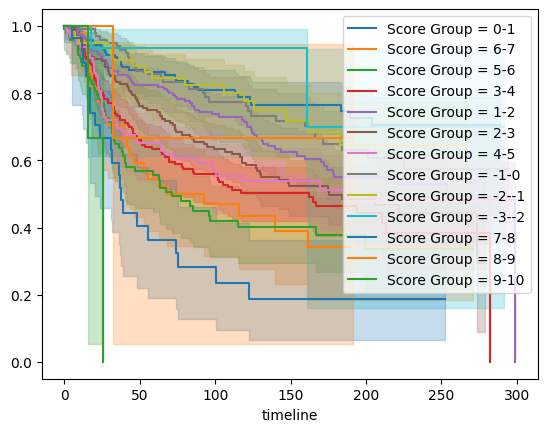

In [24]:
kmf = KaplanMeierFitter()

groups = df_relapse['score_category'].unique()

# Loop over each score group
for score_group in groups:
    mask = df_relapse['score_category'] == score_group
    kmf.fit(df_relapse['Relapse Free Status (Months)'][mask], event_observed=df_relapse['Relapse Free Status'][mask], label=f'Score Group = {score_group}')
    kmf.plot_survival_function()

    # Calculate and print median survival time for this group
    median_survival_time = kmf.median_survival_time_
    print(f"Median Survival Time for Score Group {score_group}: {median_survival_time} months")

# Perform the Log-Rank Test between each pair of groups
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        mask1 = df_relapse['score_category'] == group1
        mask2 = df_relapse['score_category'] == group2
        result = logrank_test(df_relapse['Relapse Free Status (Months)'][mask1], df_relapse['Relapse Free Status (Months)'][mask2], event_observed_A=df_relapse['Relapse Free Status'][mask1], event_observed_B=df_relapse['Relapse Free Status'][mask2])
        print(f"Log-Rank Test between Group {group1} and Group {group2}: p-value = {result.p_value}")

# Show the plot'Relapse Free Status (Months)'
plt.show()

In [25]:
bins = [-6, 0, 2, 4, 6,10]


df_relapse['score_category'] = pd.cut(df_relapse['total_score'], bins=bins, include_lowest=True,
                                      labels=["-6-0", "0-2", "2-4","4-6","6-10"])

print(df_relapse[['total_score', 'score_category']])

      total_score score_category
1             0.0           -6-0
4             6.0            4-6
5             5.0            4-6
10            3.0            2-4
11            1.0            0-2
...           ...            ...
1697          4.0            2-4
1698          1.0            0-2
1700          2.0            0-2
1702          3.0            2-4
1743          2.0            0-2

[1092 rows x 2 columns]


Median Survival Time for Score Group -6-0: inf months
Median Survival Time for Score Group 4-6: 71.12 months
Median Survival Time for Score Group 2-4: 165.07 months
Median Survival Time for Score Group 0-2: 220.89 months
Median Survival Time for Score Group 6-10: 37.53 months


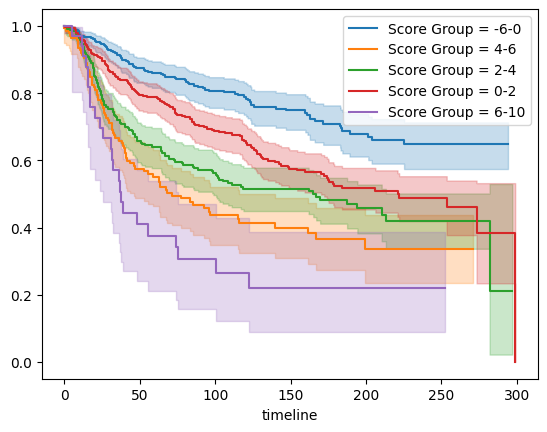

Log-Rank Test between Group -6-0 and Group 4-6: p-value = 2.5289855032743906e-15
Log-Rank Test between Group -6-0 and Group 2-4: p-value = 2.2224011929613309e-10
Log-Rank Test between Group -6-0 and Group 0-2: p-value = 4.150670960964874e-05
Log-Rank Test between Group -6-0 and Group 6-10: p-value = 1.4582465805040602e-15
Log-Rank Test between Group 4-6 and Group 2-4: p-value = 0.04150599417158362
Log-Rank Test between Group 4-6 and Group 0-2: p-value = 2.607171756164785e-06
Log-Rank Test between Group 4-6 and Group 6-10: p-value = 0.06808968978327043
Log-Rank Test between Group 2-4 and Group 0-2: p-value = 0.006785705167676801
Log-Rank Test between Group 2-4 and Group 6-10: p-value = 0.0013951143343124937
Log-Rank Test between Group 0-2 and Group 6-10: p-value = 7.435993567412723e-08


In [26]:
kmf = KaplanMeierFitter()

groups = df_relapse['score_category'].unique()

# Loop over each score group
for score_group in groups:
    mask = df_relapse['score_category'] == score_group
    kmf.fit(df_relapse['Relapse Free Status (Months)'][mask], event_observed=df_relapse['Relapse Free Status'][mask], label=f'Score Group = {score_group}')
    kmf.plot_survival_function()

    # Calculate and print median survival time for this group
    median_survival_time = kmf.median_survival_time_
    print(f"Median Survival Time for Score Group {score_group}: {median_survival_time} months")
# Show the plot'Relapse Free Status (Months)'
plt.show()
# Perform the Log-Rank Test between each pair of groups
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        mask1 = df_relapse['score_category'] == group1
        mask2 = df_relapse['score_category'] == group2
        result = logrank_test(df_relapse['Relapse Free Status (Months)'][mask1], df_relapse['Relapse Free Status (Months)'][mask2], event_observed_A=df_relapse['Relapse Free Status'][mask1], event_observed_B=df_relapse['Relapse Free Status'][mask2])
        print(f"Log-Rank Test between Group {group1} and Group {group2}: p-value = {result.p_value}")


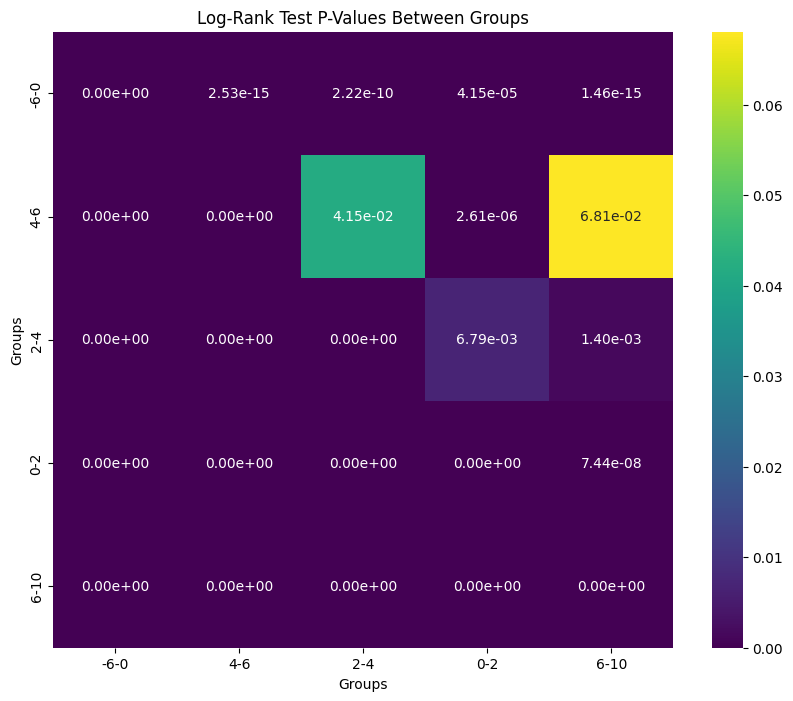

In [27]:
p_values = np.zeros((len(groups), len(groups)))

# Perform the Log-Rank Test between each pair of groups and store p-values
for i, group1 in enumerate(groups):
    for j, group2 in enumerate(groups):
        if i < j:  # Avoid redundant calculations and diagonal entries
            mask1 = df_relapse['score_category'] == group1
            mask2 = df_relapse['score_category'] == group2
            result = logrank_test(df_relapse['Relapse Free Status (Months)'][mask1], df_relapse['Relapse Free Status (Months)'][mask2], event_observed_A=df_relapse['Relapse Free Status'][mask1], event_observed_B=df_relapse['Relapse Free Status'][mask2])
            p_values[i, j] = result.p_value

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, fmt=".2e", cmap="viridis", xticklabels=groups, yticklabels=groups)
plt.title("Log-Rank Test P-Values Between Groups")
plt.xlabel("Groups")
plt.ylabel("Groups")
plt.show()

Survival

In [28]:
df_survival = df_metabric[['Overall Survival Status','Overall Survival (Months)','Age Group', 'Lymph nodes examined positive','Mutation Count','Pam50 + Claudin-low subtype', 'Neoplasm Histologic Grade', '3-Gene classifier subtype', 'PR Status', 'Tumor Stage', 'HER2 status measured by SNP6','Radio Therapy','Inferred Menopausal State']]


In [29]:
df_survival

,Overall Survival Status,Overall Survival (Months),Age Group,Lymph nodes examined positive,Mutation Count,Pam50 + Claudin-low subtype,Neoplasm Histologic Grade,3-Gene classifier subtype,PR Status,Tumor Stage,HER2 status measured by SNP6,Radio Therapy,Inferred Menopausal State
1,0,84.633333,40.0-50.0,0.0,2.0,LumA,3.0,ER+/HER2- High Prolif,Positive,1,Neutral,Yes,Pre
4,1,41.366667,70.0-80.0,8.0,2.0,LumB,3.0,ER+/HER2- High Prolif,Positive,2,Neutral,Yes,Post
5,1,7.800000,70.0-80.0,0.0,4.0,LumB,3.0,ER+/HER2- High Prolif,Positive,4,Neutral,Yes,Post
10,1,36.566667,80.0-90.0,1.0,4.0,LumB,3.0,ER+/HER2- High Prolif,Negative,2,Gain,Yes,Post
11,1,36.266667,80.0-90.0,0.0,5.0,Her2,2.0,ER+/HER2- High Prolif,Negative,2,Loss,No,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,1,85.000000,70.0-80.0,4.0,11.0,LumA,2.0,ER+/HER2- Low Prolif,Positive,2,Neutral,No,Post
1698,0,201.166667,70.0-80.0,0.0,9.0,LumB,1.0,ER+/HER2- Low Prolif,Positive,1,Neutral,Yes,Post
1700,1,105.200000,70.0-80.0,0.0,4.0,Basal,3.0,ER-/HER2-,Negative,1,Gain,No,Post
1702,0,200.333333,50.0-60.0,6.0,5.0,Normal,2.0,ER+/HER2- High Prolif,Positive,2,Neutral,Yes,Post


In [30]:
df_survival['Lymph nodes examined positive'].unique()

array([ 0.,  8.,  1., 16.,  5., 14.,  6.,  2.,  3.,  9., 22.,  4.,  7.,
       21., 12., 25., 10., 41., 15., 13., 11., 19., 17., 23., 18., 31.])

In [31]:
df_survival['Mutation Count'].unique()

array([ 2.,  4.,  5.,  1.,  3.,  8.,  7., 11.,  9.,  6., 21., 10., 14.,
       22., 13., 12., 16., 23., 18., 26., 15., 40., 46., 30., 17., 19.,
       20.])

In [32]:
mutation_count_min = df_survival['Mutation Count'].min()
mutation_count_max = df_survival['Mutation Count'].max()


bins = pd.interval_range(start=mutation_count_min, end=mutation_count_max, freq=(mutation_count_max - mutation_count_min)/5)


df_survival['Mutation_Count_Group'] = pd.cut(df_survival['Mutation Count'], bins=bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


print(df_survival[['Mutation Count', 'Mutation_Count_Group']])

      Mutation Count Mutation_Count_Group
1                2.0          (1.0, 10.0]
4                2.0          (1.0, 10.0]
5                4.0          (1.0, 10.0]
10               4.0          (1.0, 10.0]
11               5.0          (1.0, 10.0]
...              ...                  ...
1697            11.0         (10.0, 19.0]
1698             9.0          (1.0, 10.0]
1700             4.0          (1.0, 10.0]
1702             5.0          (1.0, 10.0]
1743             3.0          (1.0, 10.0]

[1092 rows x 2 columns]


<ipython-input-32-7249a44aba51>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survival['Mutation_Count_Group'] = pd.cut(df_survival['Mutation Count'], bins=bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


In [33]:
bins = [0, 8, 16, 24, 32, 41]


df_survival['lymph_nodes_group'] = pd.cut(df_survival['Lymph nodes examined positive'], bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


print(df_survival[['Lymph nodes examined positive', 'lymph_nodes_group']])

      Lymph nodes examined positive lymph_nodes_group
1                               0.0           Group 1
4                               8.0           Group 1
5                               0.0           Group 1
10                              1.0           Group 1
11                              0.0           Group 1
...                             ...               ...
1697                            4.0           Group 1
1698                            0.0           Group 1
1700                            0.0           Group 1
1702                            6.0           Group 1
1743                            0.0           Group 1

[1092 rows x 2 columns]


<ipython-input-33-0f94322b35a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survival['lymph_nodes_group'] = pd.cut(df_survival['Lymph nodes examined positive'], bins, include_lowest=True, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])


In [34]:
df_survival = df_survival.drop(columns=['Lymph nodes examined positive','Mutation Count'], axis=1)
from sklearn.preprocessing import StandardScaler
df_survival = pd.get_dummies(df_survival, drop_first=True)

scaler = StandardScaler()
df_survival_scaled = scaler.fit_transform(df_survival)
df_survival_scaled = pd.DataFrame(df_survival_scaled, columns=df_survival.columns)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_survival, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')
print(cph.summary)
cph.check_assumptions(df_survival, p_value_threshold=0.05)

                                                    coef  exp(coef)  se(coef)  \
covariate                                                                       
Neoplasm Histologic Grade                       0.074019   1.076827  0.070424   
Age Group_30.0-40.0                            -0.205850   0.813955  0.227462   
Age Group_40.0-50.0                            -0.301129   0.739982  0.175788   
Age Group_50.0-60.0                            -0.383842   0.681239  0.136061   
Age Group_60.0-70.0                             0.007408   1.007435  0.128906   
Age Group_70.0-80.0                             0.434186   1.543707  0.136372   
Age Group_80.0-90.0                             0.685306   1.984380  0.182971   
Age Group_90.0-100.0                            1.448679   4.257489  0.530516   
Pam50 + Claudin-low subtype_Her2                0.217217   1.242614  0.152018   
Pam50 + Claudin-low subtype_LumA               -0.080926   0.922262  0.123407   
Pam50 + Claudin-low subtype_

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1092 total observations, 484 right-censored observations>
         test_name = proportional_hazard_test

---
                                                     test_statistic    p  -log2(p)
3-Gene classifier subtype_ER+/HER2- Low Prolif km              0.23 0.63      0.67
                                               rank            0.36 0.55      0.86
3-Gene classifier subtype_ER-/HER2-            km              2.14 0.14      2.80
                                               rank            2.20 0.14      2.86
3-Gene classifier subtype_HER2+                km              2.52 0.11      3.16
                                               rank            2.78 0.10      3.39
Age Group_30.0-40.0                            km              1.72 0.19      2.40
                                               rank            1.83 0.18      2.51
Age Group_40.0-50.0                            km              0.62 0.43      1.22
                                               rank            0.33 0.57      0.82
Age Group_50.0-60.0                            km              1.30 0.25      1.98
                                               rank            1.38 0.24      2.06
Age Group_60.0-70.0                            km              1.43 0.23      2.11
                                               rank            1.30 0.25      1.97
Age Group_70.0-80.0                            km              3.78 0.05      4.27
                                               rank            3.63 0.06      4.14
Age Group_80.0-90.0                            km              1.07 0.30      1.73
                                               rank            1.19 0.27      1.86
Age Group_90.0-100.0                           km              0.14 0.70      0.51
                                               rank            0.24 0.63      0.67
HER2 status measured by SNP6_Loss              km              0.03 0.86      0.22
                                               rank            0.07 0.79      0.35
HER2 status measured by SNP6_Neutral           km              0.07 0.79      0.33
                                               rank            0.01 0.91      0.14
HER2 status measured by SNP6_Undef             km              0.05 0.82      0.28
                                               rank            0.02 0.89      0.17
Inferred Menopausal State_Pre                  km              3.07 0.08      3.65
                                               rank            2.76 0.10      3.37
Mutation_Count_Group_(10.0, 19.0]              km              0.00 0.98      0.03
                                               rank            0.00 0.98      0.02
Mutation_Count_Group_(19.0, 28.0]              km              0.14 0.70      0.50
                                               rank            0.08 0.78      0.36
Mutation_Count_Group_(28.0, 37.0]              km              1.92 0.17      2.59
                                               rank            2.28 0.13      2.93
Mutation_Count_Group_(37.0, 46.0]              km              1.18 0.28      1.85
                                               rank            0.55 0.46      1.13
Neoplasm Histologic Grade                      km              1.39 0.24      2.07
                                               rank            1.70 0.19      2.38
PR Status_Positive                             km              4.43 0.04      4.83
                                               rank            5.16 0.02      5.44
Pam50 + Claudin-low subtype_Her2               km              0.96 0.33      1.61
                                               rank            0.76 0.38      1.38
Pam50 + Claudin-low subtype_LumA               km              3.26 0.07      3.82
                                               rank            4.16 0.



1. Variable 'Age Group_70.0-80.0' failed the non-proportional test: p-value is 0.0520.

   Advice: with so few unique values (only 2), you can include `strata=['Age Group_70.0-80.0', ...]`
in the call in `.fit`. See documentation in link [E] below.

2. Variable 'Pam50 + Claudin-low subtype_LumA' failed the non-proportional test: p-value is 0.0415.

   Advice: with so few unique values (only 2), you can include `strata=['Pam50 + Claudin-low
subtype_LumA', ...]` in the call in `.fit`. See documentation in link [E] below.

3. Variable 'PR Status_Positive' failed the non-proportional test: p-value is 0.0231.

   Advice: with so few unique values (only 2), you can include `strata=['PR Status_Positive', ...]`
in the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-vari

[]

In [35]:
from sklearn.preprocessing import StandardScaler
df_survival = pd.get_dummies(df_survival, drop_first=True)

scaler = StandardScaler()
df_survival_scaled = scaler.fit_transform(df_survival)
df_survival_scaled = pd.DataFrame(df_survival_scaled, columns=df_survival.columns)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_survival, duration_col='Overall Survival (Months)', event_col='Overall Survival Status',strata=['Age Group_70.0-80.0','Pam50 + Claudin-low subtype_LumA','PR Status_Positive','Mutation_Count_Group_(10.0, 19.0]'])
print(cph.summary)
cph.check_assumptions(df_survival, p_value_threshold=0.05)

                                                    coef  exp(coef)  se(coef)  \
covariate                                                                       
Neoplasm Histologic Grade                       0.099953   1.105118  0.071867   
Age Group_30.0-40.0                            -0.139593   0.869712  0.230363   
Age Group_40.0-50.0                            -0.239916   0.786694  0.178822   
Age Group_50.0-60.0                            -0.279494   0.756166  0.147217   
Age Group_60.0-70.0                             0.145438   1.156546  0.141801   
Age Group_80.0-90.0                             0.813623   2.256067  0.193883   
Age Group_90.0-100.0                            1.420569   4.139476  0.546264   
Pam50 + Claudin-low subtype_Her2                0.105675   1.111461  0.159937   
Pam50 + Claudin-low subtype_LumB               -0.093186   0.911024  0.143363   
Pam50 + Claudin-low subtype_NC                 -0.757021   0.469062  0.874016   
Pam50 + Claudin-low subtype_

[]

In [36]:
hr_df = cph.hazard_ratios_
scores = {covariate: 1 if hr > 1 else (-1 if hr < 1 else 0) for covariate, hr in hr_df.items()}

for covariate in scores:
    df_survival[covariate + '_score'] = df_survival[covariate] * scores[covariate]


df_survival['total_score'] = df_survival[[cov + '_score' for cov in scores]].sum(axis=1)


min_score = int(df_survival['total_score'].min())
max_score = int(df_survival['total_score'].max())

bins = list(range(min_score, max_score + 2))
labels = [f"{i}-{i+1}" for i in range(min_score, max_score + 1)]


df_survival['score_category'] = pd.cut(df_survival['total_score'], bins=bins, right=False, labels=labels, include_lowest=True)


print(df_survival[['total_score', 'score_category']])

      total_score score_category
1            -2.0          -2--1
4             1.0            1-2
5             1.0            1-2
10            3.0            3-4
11            4.0            4-5
...           ...            ...
1697          1.0            1-2
1698         -4.0          -4--3
1700          3.0            3-4
1702          1.0            1-2
1743          1.0            1-2

[1092 rows x 2 columns]


Median Survival Time for Score Group -2--1: 219.6666667 months
Median Survival Time for Score Group 1-2: 147.7666667 months
Median Survival Time for Score Group 3-4: 96.9 months
Median Survival Time for Score Group 4-5: 72.46666667 months
Median Survival Time for Score Group -1-0: 234.3333333 months
Median Survival Time for Score Group 0-1: 174.1333333 months
Median Survival Time for Score Group -3--2: inf months
Median Survival Time for Score Group 2-3: 131.6666667 months
Median Survival Time for Score Group -4--3: inf months
Median Survival Time for Score Group 5-6: 80.73333333 months
Median Survival Time for Score Group 6-7: 49.43333333 months
Median Survival Time for Score Group -5--4: inf months
Median Survival Time for Score Group 7-8: 39.53333333 months
Median Survival Time for Score Group -6--5: inf months
Log-Rank Test between Group -2--1 and Group 1-2: p-value = 0.004179232666196079
Log-Rank Test between Group -2--1 and Group 3-4: p-value = 4.158230206620091e-07
Log-Rank Test

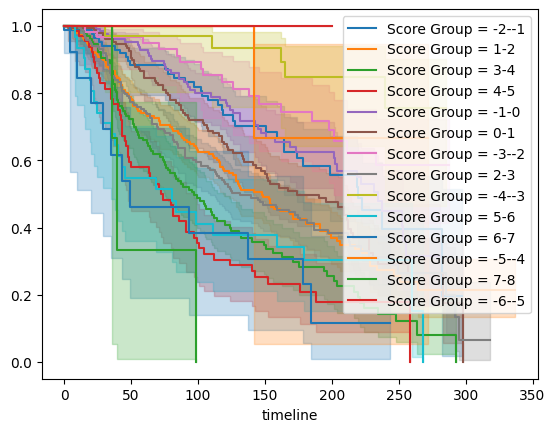

In [37]:
kmf = KaplanMeierFitter()

groups = df_survival['score_category'].unique()

# Loop over each score group
for score_group in groups:
    mask = df_survival['score_category'] == score_group
    kmf.fit(df_survival['Overall Survival (Months)'][mask], event_observed=df_survival['Overall Survival Status'][mask], label=f'Score Group = {score_group}')
    kmf.plot_survival_function()

    # Calculate and print median survival time for this group
    median_survival_time = kmf.median_survival_time_
    print(f"Median Survival Time for Score Group {score_group}: {median_survival_time} months")

# Perform the Log-Rank Test between each pair of groups
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        mask1 = df_survival['score_category'] == group1
        mask2 = df_survival['score_category'] == group2
        result = logrank_test(df_survival['Overall Survival (Months)'][mask1], df_survival['Overall Survival (Months)'][mask2], event_observed_A=df_survival['Overall Survival Status'][mask1], event_observed_B=df_survival['Overall Survival Status'][mask2])
        print(f"Log-Rank Test between Group {group1} and Group {group2}: p-value = {result.p_value}")

# Show the plot
plt.show()

In [38]:
df_survival.columns

Index(['Overall Survival Status', 'Overall Survival (Months)',
       'Neoplasm Histologic Grade', 'Age Group_30.0-40.0',
       'Age Group_40.0-50.0', 'Age Group_50.0-60.0', 'Age Group_60.0-70.0',
       'Age Group_70.0-80.0', 'Age Group_80.0-90.0', 'Age Group_90.0-100.0',
       'Pam50 + Claudin-low subtype_Her2', 'Pam50 + Claudin-low subtype_LumA',
       'Pam50 + Claudin-low subtype_LumB', 'Pam50 + Claudin-low subtype_NC',
       'Pam50 + Claudin-low subtype_Normal',
       'Pam50 + Claudin-low subtype_claudin-low',
       '3-Gene classifier subtype_ER+/HER2- Low Prolif',
       '3-Gene classifier subtype_ER-/HER2-',
       '3-Gene classifier subtype_HER2+', 'PR Status_Positive',
       'Tumor Stage_1', 'Tumor Stage_2', 'Tumor Stage_3', 'Tumor Stage_4',
       'HER2 status measured by SNP6_Loss',
       'HER2 status measured by SNP6_Neutral',
       'HER2 status measured by SNP6_Undef', 'Radio Therapy_Yes',
       'Inferred Menopausal State_Pre', 'Mutation_Count_Group_(10.0, 19.0]'

In [40]:
hr_df = cph.hazard_ratios_
scores = {covariate: 1 if hr > 1 else (-1 if hr < 1 else 0) for covariate, hr in hr_df.items()}

for covariate in scores:
    df_survival[covariate + '_score'] = df_survival[covariate] * scores[covariate]


df_survival['total_score'] = df_survival[[cov + '_score' for cov in scores]].sum(axis=1)


min_score = int(df_survival['total_score'].min())
max_score = int(df_survival['total_score'].max())

bins = list(range(min_score, max_score + 2))
labels = [f"{i}-{i+1}" for i in range(min_score, max_score + 1)]


df_survival['score_category'] = pd.cut(df_survival['total_score'], bins=bins, right=False, labels=labels, include_lowest=True)


print(df_survival[['total_score', 'score_category']])

      total_score score_category
1            -2.0          -2--1
4             1.0            1-2
5             1.0            1-2
10            3.0            3-4
11            4.0            4-5
...           ...            ...
1697          1.0            1-2
1698         -4.0          -4--3
1700          3.0            3-4
1702          1.0            1-2
1743          1.0            1-2

[1092 rows x 2 columns]


Median Survival Time for Score Group -2--1: 219.6666667 months
Median Survival Time for Score Group 1-2: 147.7666667 months
Median Survival Time for Score Group 3-4: 96.9 months
Median Survival Time for Score Group 4-5: 72.46666667 months
Median Survival Time for Score Group -1-0: 234.3333333 months
Median Survival Time for Score Group 0-1: 174.1333333 months
Median Survival Time for Score Group -3--2: inf months
Median Survival Time for Score Group 2-3: 131.6666667 months
Median Survival Time for Score Group -4--3: inf months
Median Survival Time for Score Group 5-6: 80.73333333 months
Median Survival Time for Score Group 6-7: 49.43333333 months
Median Survival Time for Score Group -5--4: inf months
Median Survival Time for Score Group 7-8: 39.53333333 months
Median Survival Time for Score Group -6--5: inf months
Log-Rank Test between Group -2--1 and Group 1-2: p-value = 0.004179232666196079
Log-Rank Test between Group -2--1 and Group 3-4: p-value = 4.158230206620091e-07
Log-Rank Test

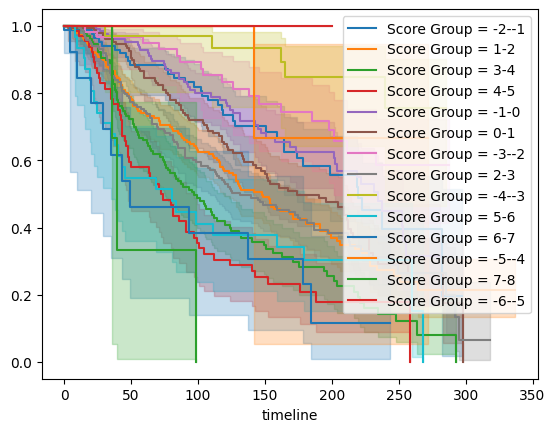

In [41]:
# Instantiate the KaplanMeierFitter
kmf = KaplanMeierFitter()

groups = df_survival['score_category'].unique()

# Loop over each score group
for score_group in groups:
    mask = df_survival['score_category'] == score_group
    kmf.fit(df_survival['Overall Survival (Months)'][mask], event_observed=df_survival['Overall Survival Status'][mask], label=f'Score Group = {score_group}')
    kmf.plot_survival_function()

    # Calculate and print median survival time for this group
    median_survival_time = kmf.median_survival_time_
    print(f"Median Survival Time for Score Group {score_group}: {median_survival_time} months")

# Perform the Log-Rank Test between each pair of groups
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        mask1 = df_survival['score_category'] == group1
        mask2 = df_survival['score_category'] == group2
        result = logrank_test(df_survival['Overall Survival (Months)'][mask1], df_survival['Overall Survival (Months)'][mask2], event_observed_A=df_survival['Overall Survival Status'][mask1], event_observed_B=df_survival['Overall Survival Status'][mask2])
        print(f"Log-Rank Test between Group {group1} and Group {group2}: p-value = {result.p_value}")

# Show the kmf plot
plt.show()

In [42]:
bins = [-6, -2, 0, 2, 6, 8,9]


df_survival['score_category'] = pd.cut(df_survival['total_score'], bins=bins, include_lowest=True,
                                      labels=["-6--2", "-2-0", "0-2", "2-6","6-8","8-9"])

print(df_survival[['total_score', 'score_category']])

      total_score score_category
1            -2.0          -6--2
4             1.0            0-2
5             1.0            0-2
10            3.0            2-6
11            4.0            2-6
...           ...            ...
1697          1.0            0-2
1698         -4.0          -6--2
1700          3.0            2-6
1702          1.0            0-2
1743          1.0            0-2

[1092 rows x 2 columns]


In [43]:
df_survival['total_score'].min()

-6.0

Median Survival Time for Score Group -6--2: 282.5666667 months
Median Survival Time for Score Group 0-2: 141.56666669999998 months
Median Survival Time for Score Group 2-6: 83.66666667 months
Median Survival Time for Score Group -2-0: 209.0333333 months
Median Survival Time for Score Group 6-8: 39.53333333 months
Log-Rank Test between Group -6--2 and Group 0-2: p-value = 1.0601008118685044e-10
Log-Rank Test between Group -6--2 and Group 2-6: p-value = 1.389741358793947e-22
Log-Rank Test between Group -6--2 and Group -2-0: p-value = 0.00033254930284259786
Log-Rank Test between Group -6--2 and Group 6-8: p-value = 7.546769028288326e-08
Log-Rank Test between Group 0-2 and Group 2-6: p-value = 2.9738028452051178e-06
Log-Rank Test between Group 0-2 and Group -2-0: p-value = 0.00029429779639259044
Log-Rank Test between Group 0-2 and Group 6-8: p-value = 0.015525759997095306
Log-Rank Test between Group 2-6 and Group -2-0: p-value = 3.1381919275903256e-15
Log-Rank Test between Group 2-6 and Gr

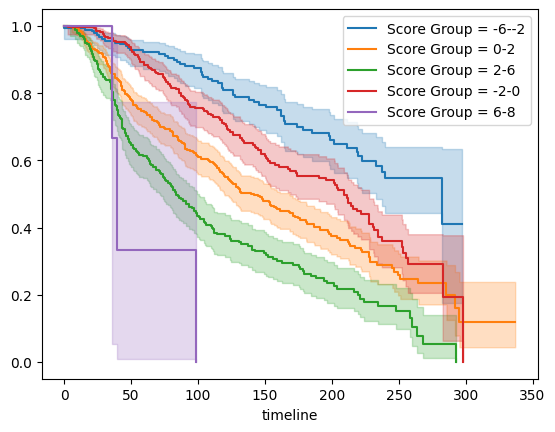

In [44]:
kmf = KaplanMeierFitter()

groups = df_survival['score_category'].unique()

# Loop over each score group
for score_group in groups:
    mask = df_survival['score_category'] == score_group
    kmf.fit(df_survival['Overall Survival (Months)'][mask], event_observed=df_survival['Overall Survival Status'][mask], label=f'Score Group = {score_group}')
    kmf.plot_survival_function()

    # Calculate and print median survival time for this group
    median_survival_time = kmf.median_survival_time_
    print(f"Median Survival Time for Score Group {score_group}: {median_survival_time} months")

# Perform the Log-Rank Test between each pair of groups
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        mask1 = df_survival['score_category'] == group1
        mask2 = df_survival['score_category'] == group2
        result = logrank_test(df_survival['Overall Survival (Months)'][mask1], df_survival['Overall Survival (Months)'][mask2], event_observed_A=df_survival['Overall Survival Status'][mask1], event_observed_B=df_survival['Overall Survival Status'][mask2])
        print(f"Log-Rank Test between Group {group1} and Group {group2}: p-value = {result.p_value}")

# Show the kmf plot
plt.show()

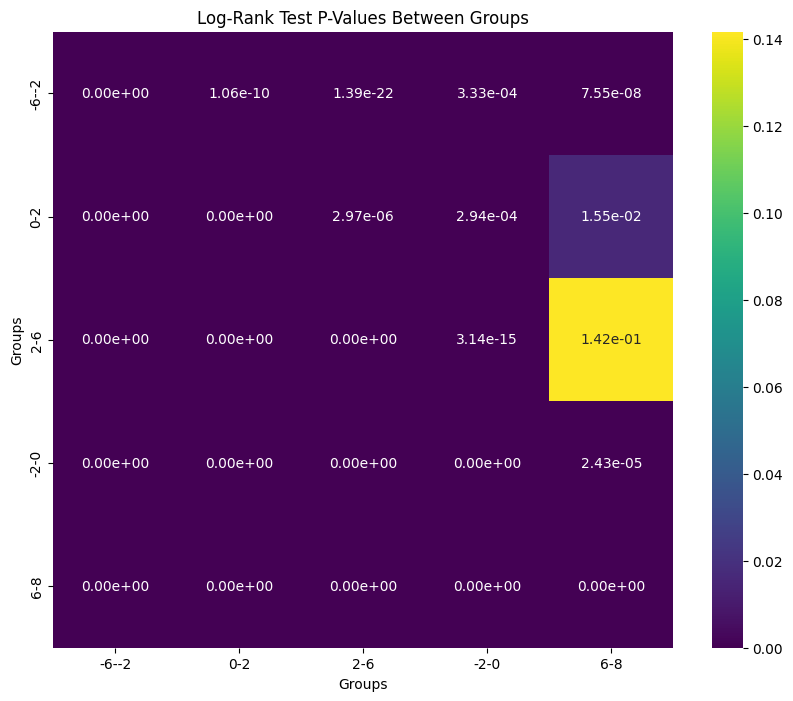

In [45]:
p_values = np.zeros((len(groups), len(groups)))

# Perform the Log-Rank Test between each pair of groups and store p-values
for i, group1 in enumerate(groups):
    for j, group2 in enumerate(groups):
        if i < j:  # Avoid redundant calculations and diagonal entries
            mask1 = df_survival['score_category'] == group1
            mask2 = df_survival['score_category'] == group2
            result = logrank_test(df_survival['Overall Survival (Months)'][mask1], df_survival['Overall Survival (Months)'][mask2], event_observed_A=df_survival['Overall Survival Status'][mask1], event_observed_B=df_survival['Overall Survival Status'][mask2])
            p_values[i, j] = result.p_value

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, fmt=".2e", cmap="viridis", xticklabels=groups, yticklabels=groups)
plt.title("Log-Rank Test P-Values Between Groups")
plt.xlabel("Groups")
plt.ylabel("Groups")
plt.show()